### Угадываем признак

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('D:\\Netology\\DS\\athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [10]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [11]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [12]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [13]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [16]:
X = data.drop(['sex'], axis=1)
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [17]:
y = data['sex']

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [19]:
ft = ohe.fit_transform(data[['nationality', 'sport']])

In [20]:
ft.toarray().shape

(10858, 227)

In [21]:
ohe.transform(data[['nationality', 'sport']])

<10858x227 sparse matrix of type '<class 'numpy.float64'>'
	with 21716 stored elements in Compressed Sparse Row format>

In [22]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [23]:
le.fit( data['sex'] )

LabelEncoder()

In [24]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [25]:
model = LogisticRegression()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=800)
X_train.head(5)

,height,weight,gold,silver,bronze
3128,1.63,52.0,0,0,0
2611,1.90,87.0,0,0,0
148,1.62,65.0,0,0,0
27,1.85,75.0,0,0,0
8908,1.75,65.0,0,0,0


In [27]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predictions = model.predict_proba(X_test)

In [29]:
predictions

array([[0.81518609, 0.18481391],
       [0.9189505 , 0.0810495 ],
       [0.25460081, 0.74539919],
       ...,
       [0.11757357, 0.88242643],
       [0.07151666, 0.92848334],
       [0.7664485 , 0.2335515 ]])

In [30]:
np.where(predictions >= 0.5, 1, 0)

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [31]:
for line in zip( predictions[:, 1], y_test ):
    print( line )

(0.1848139085137425, 0)
(0.0810494994507799, 0)
(0.7453991896277826, 1)
(0.5169247642495858, 1)
(0.9133091899452038, 1)
(0.9617860186467221, 1)
(0.966994136738985, 1)
(0.8243751650335587, 1)
(0.8899045807681756, 1)
(0.3637877989072821, 1)
(0.049652952875016816, 0)
(0.1400287443295911, 0)
(0.4265834781444325, 0)
(0.46989132583048276, 0)
(0.3345691532153597, 1)
(0.2530221286420074, 1)
(0.5746952993564207, 1)
(0.95673841293074, 1)
(0.23403822847546224, 0)
(0.3110987125749611, 0)
(0.28876927494805227, 0)
(0.9193391691096205, 1)
(0.32820555729374795, 0)
(0.2602673542052792, 1)
(0.523018387154534, 0)
(0.7740939239802223, 1)
(0.8631824432106132, 1)
(0.2784147559296361, 1)
(0.07186470849245878, 0)
(0.18669523874538885, 1)
(0.8004205315888377, 1)
(0.0685016365337901, 0)
(0.9393954703358866, 1)
(0.36945683924902345, 0)
(0.6405510579230533, 1)
(0.11532030638702745, 0)
(0.11532030638702745, 0)
(0.6562163919111096, 0)
(0.21790983745374273, 0)
(0.19228362072207839, 1)
(0.3745301140090787, 1)
(0.1619

In [112]:
# ДЗ

In [57]:
def ROC_calc(i): 
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0 
    for predicted_prob, actual, in zip( predictions[:, 1], y_test ):    
        if predicted_prob >= i :
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp / (tp + fn), 1 - (tn / (tn + fp))

In [59]:
for i in range(10):
    i = i / 10
    ROC_calc(i)
    print(ROC_calc(i))


(1.0, 1.0)
(0.9948805460750854, 0.8813333333333333)
(0.9613196814562003, 0.6566666666666667)
(0.9101251422070534, 0.4693333333333334)
(0.8549488054607508, 0.3373333333333334)
(0.7901023890784983, 0.24)
(0.7081911262798635, 0.16266666666666663)
(0.6160409556313993, 0.11133333333333328)
(0.4658703071672355, 0.06266666666666665)
(0.2895335608646189, 0.02400000000000002)


In [103]:
points = []
for i in range(1000):
    i = i / 1000
    ROC_calc(i)
    points.append(ROC_calc(i))

In [104]:
ROC_curves = pd.DataFrame(points, columns = ['TPR', 'FPR'])

In [109]:
ROC_curves

,TPR,FPR
0,1.000000,1.000000
1,1.000000,1.000000
2,1.000000,1.000000
3,1.000000,1.000000
4,1.000000,0.999333
...,...,...
995,0.025028,0.001333
996,0.022184,0.000667
997,0.015927,0.000000
998,0.011945,0.000000


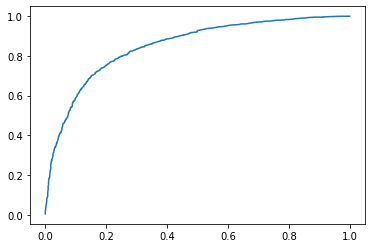

In [110]:
plt.plot(ROC_curves['FPR'], ROC_curves['TPR'])

In [55]:
from sklearn.metrics import roc_curve

In [56]:
# predictions = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]

In [57]:
predictions

array([0.18481391, 0.0810495 , 0.74539919, ..., 0.88242643, 0.92848334,
       0.2335515 ])

In [58]:
np.where(predictions >= 1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
fpr, tpr, thres = roc_curve( y_test, predictions)

In [81]:
from matplotlib import pyplot as plt

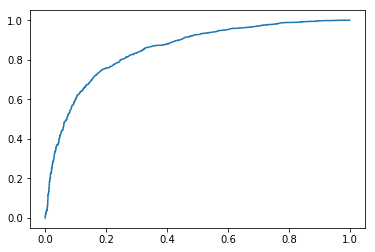

In [84]:
plt.plot( fpr, tpr )

In [131]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98066667, 0.98266667,
       1.        ])

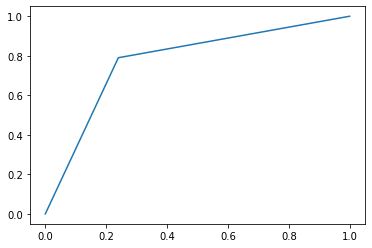

In [29]:
fpr, tpr, thres = roc_curve( y_test, model.predict(X_test))
plt.plot( fpr, tpr )

In [123]:
tpr.shape

(1180,)

In [121]:
tpr.shape

(3,)

In [126]:
tpr

array([0.        , 0.79067122, 1.        ])

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y_test, predictions)

0.8502499051952976

In [32]:
roc_auc_score(y_test, model.predict(X_test))

0.7750511945392492